In [ ]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
#To avoid warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#Check version number since PyMC3 interfaces are fluid.
print('PyMC3 version: ',pm.__version__)

PyMC3 version:  3.11.4


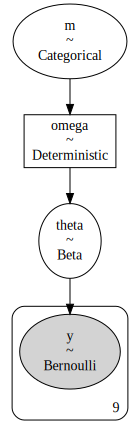

In [ ]:
data=np.r_[6*[1], 3*[0]]
with pm.Model() as hmod:
    m = pm.Categorical('m', np.asarray([.5, .5]))    
    kappa = 10  
    omega = pm.Deterministic('omega', pm.math.switch(pm.math.eq(m, 0), 0.25, 0.75) )   
    theta = pm.Beta('theta', omega*(kappa-2)+1, (1-omega)*(kappa-2)+1)    
    y = pm.Bernoulli('y', theta, observed=data)

pm.model_to_graphviz(hmod)


In [ ]:
with hmod:
    tr=pm.sample(10000, tune=2000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [m]
>NUTS: [theta]


In [ ]:
az.plot_trace(tr)

In [ ]:
az.summary(tr)

Got error No model on context stack. trying to find log_likelihood in translation.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1456b050d0>,
      dtype=object)

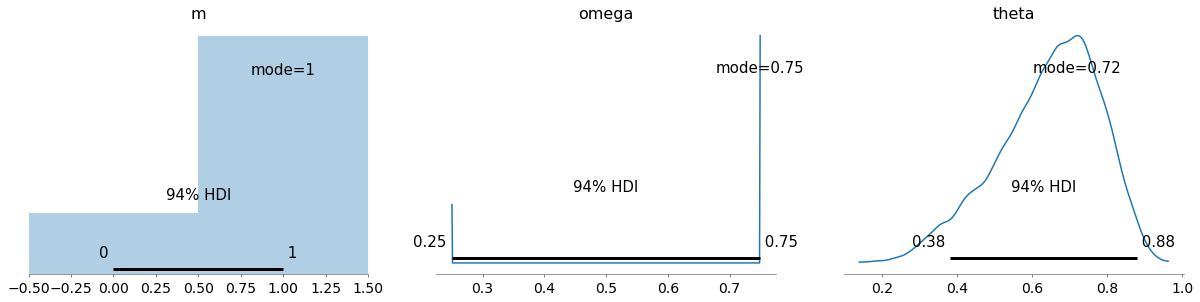

In [ ]:
az.plot_posterior(tr, point_estimate='mode')